# 1. Pre-procesameinto de los datos
        
        a. Importar los datos
        b. Limpiar los datos
        c. Separar en datos de entrenamiento y de prueba
        d. Escalamiento de las caracteristicas

        

## a.  Importar datos

### Pandas:

Biblioteca para el manejo y análisis de estructuras de datos. 

https://pandas.pydata.org/

### Numpy:  

Consiste en objetos de matrices multidimensionales y rutinas para procesar esas matrices.

https://numpy.org/

### Matplotlib y Seaborn:

Visualización de datos estadísticos.

https://matplotlib.org/

https://seaborn.pydata.org/




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('pid.100.csv')

In [27]:
data.columns.values 

array(['x', 'y', 'z', 'e', 'pt', 'px', 'py', 'pz', 'mass', 'ch', 'pid'],
      dtype=object)

## Que son los atributos? 

| Variable	| Definición | Variable | Definición |
| --- | --- | --- | --- |
| x, y, z  | Posición | pid  | Tipo partícula |
| px, py, pz  | Momento | 1 | protón |
| pt  | Momento | 101 | pión |
| e  | Energía | 106 | kaones |
| mass  | Masa | 27 | lambda |
| ch  | Carga |
| pid  | Tipo partícula |




In [28]:
data.shape #dimension (filas,columnas)

(74481, 11)

In [29]:
data.dtypes #tipo de datos 

x       float64
y       float64
z       float64
e       float64
pt      float64
px      float64
py      float64
pz      float64
mass    float64
ch        int64
pid       int64
dtype: object

In [30]:
data.head() #primeros datos

,x,y,z,e,pt,px,py,pz,mass,ch,pid
0,0.00000,-6.769840e-38,4.591490e-41,4.590280e+33,inf,0.000000,6.546840e+31,3.087900e-41,1.261170e-44,0,0
1,200.00000,-6.769840e-38,4.591490e-41,4.590280e+33,inf,0.000000,6.546840e+31,3.087900e-41,1.261170e-44,0,0
2,396.00000,8.970000e+02,2.000000e+00,6.010000e+02,1007.000000,1007.000000,0.000000e+00,0.000000e+00,1.261170e-44,0,0
3,5.75167,-9.635050e-01,1.948180e+02,3.697580e+00,0.078794,0.078725,3.297850e-03,3.583560e+00,9.077180e-01,1,1
4,6.07983,5.888980e-01,1.946590e+02,5.127310e+00,0.107422,0.016830,1.060960e-01,5.043600e+00,9.164180e-01,1,1


In [31]:
data.tail() #ultimos datos

,x,y,z,e,pt,px,py,pz,mass,ch,pid
74476,-164.5390,-60.09320,-38.1622,0.535546,0.503220,-0.466584,-0.188492,-0.120564,0.138,1,101
74477,16.6667,9.30106,-195.4820,1.508630,0.157602,0.133255,0.084151,-1.494020,0.138,0,101
74478,-24.8427,-61.70550,171.2720,0.364294,0.145348,-0.051908,-0.135763,0.304204,0.138,-1,101
74479,15.9469,22.61860,191.0670,0.727271,0.150121,0.052114,0.140785,0.698099,0.138,-1,101
74480,15.9469,22.61860,191.0670,0.727271,0.150121,0.052114,0.140785,0.698099,0.138,-1,101


## b. Limpiar los datos


### **Estadística básica** 

In [32]:
data 

,x,y,z,e,pt,px,py,pz,mass,ch,pid
0,0.00000,-6.769840e-38,4.591490e-41,4.590280e+33,inf,0.000000,6.546840e+31,3.087900e-41,1.261170e-44,0,0
1,200.00000,-6.769840e-38,4.591490e-41,4.590280e+33,inf,0.000000,6.546840e+31,3.087900e-41,1.261170e-44,0,0
2,396.00000,8.970000e+02,2.000000e+00,6.010000e+02,1007.000000,1007.000000,0.000000e+00,0.000000e+00,1.261170e-44,0,0
3,5.75167,-9.635050e-01,1.948180e+02,3.697580e+00,0.078794,0.078725,3.297850e-03,3.583560e+00,9.077180e-01,1,1
4,6.07983,5.888980e-01,1.946590e+02,5.127310e+00,0.107422,0.016830,1.060960e-01,5.043600e+00,9.164180e-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...
74476,-164.53900,-6.009320e+01,-3.816220e+01,5.355460e-01,0.503220,-0.466584,-1.884920e-01,-1.205640e-01,1.380000e-01,1,101
74477,16.66670,9.301060e+00,-1.954820e+02,1.508630e+00,0.157602,0.133255,8.415100e-02,-1.494020e+00,1.380000e-01,0,101
74478,-24.84270,-6.170550e+01,1.712720e+02,3.642940e-01,0.145348,-0.051908,-1.357630e-01,3.042040e-01,1.380000e-01,-1,101
74479,15.94690,2.261860e+01,1.910670e+02,7.272710e-01,0.150121,0.052114,1.407850e-01,6.980990e-01,1.380000e-01,-1,101


In [33]:
dataset = data[3:]
dataset

,x,y,z,e,pt,px,py,pz,mass,ch,pid
3,5.75167,-0.963505,194.8180,3.697580,0.078794,0.078725,0.003298,3.583560,0.907718,1,1
4,6.07983,0.588898,194.6590,5.127310,0.107422,0.016830,0.106096,5.043600,0.916418,1,1
5,-14.03740,-4.391730,-32.1901,0.949517,0.069311,-0.068983,-0.006730,-0.130134,0.938000,1,1
6,8.86727,0.104678,194.0270,4.936680,0.254442,-0.118410,0.225210,4.848550,0.893116,1,1
7,7.74449,-2.188510,194.6850,4.502720,0.136972,-0.017702,0.135823,4.405610,0.919962,1,1
...,...,...,...,...,...,...,...,...,...,...,...
74476,-164.53900,-60.093200,-38.1622,0.535546,0.503220,-0.466584,-0.188492,-0.120564,0.138000,1,101
74477,16.66670,9.301060,-195.4820,1.508630,0.157602,0.133255,0.084151,-1.494020,0.138000,0,101
74478,-24.84270,-61.705500,171.2720,0.364294,0.145348,-0.051908,-0.135763,0.304204,0.138000,-1,101
74479,15.94690,22.618600,191.0670,0.727271,0.150121,0.052114,0.140785,0.698099,0.138000,-1,101


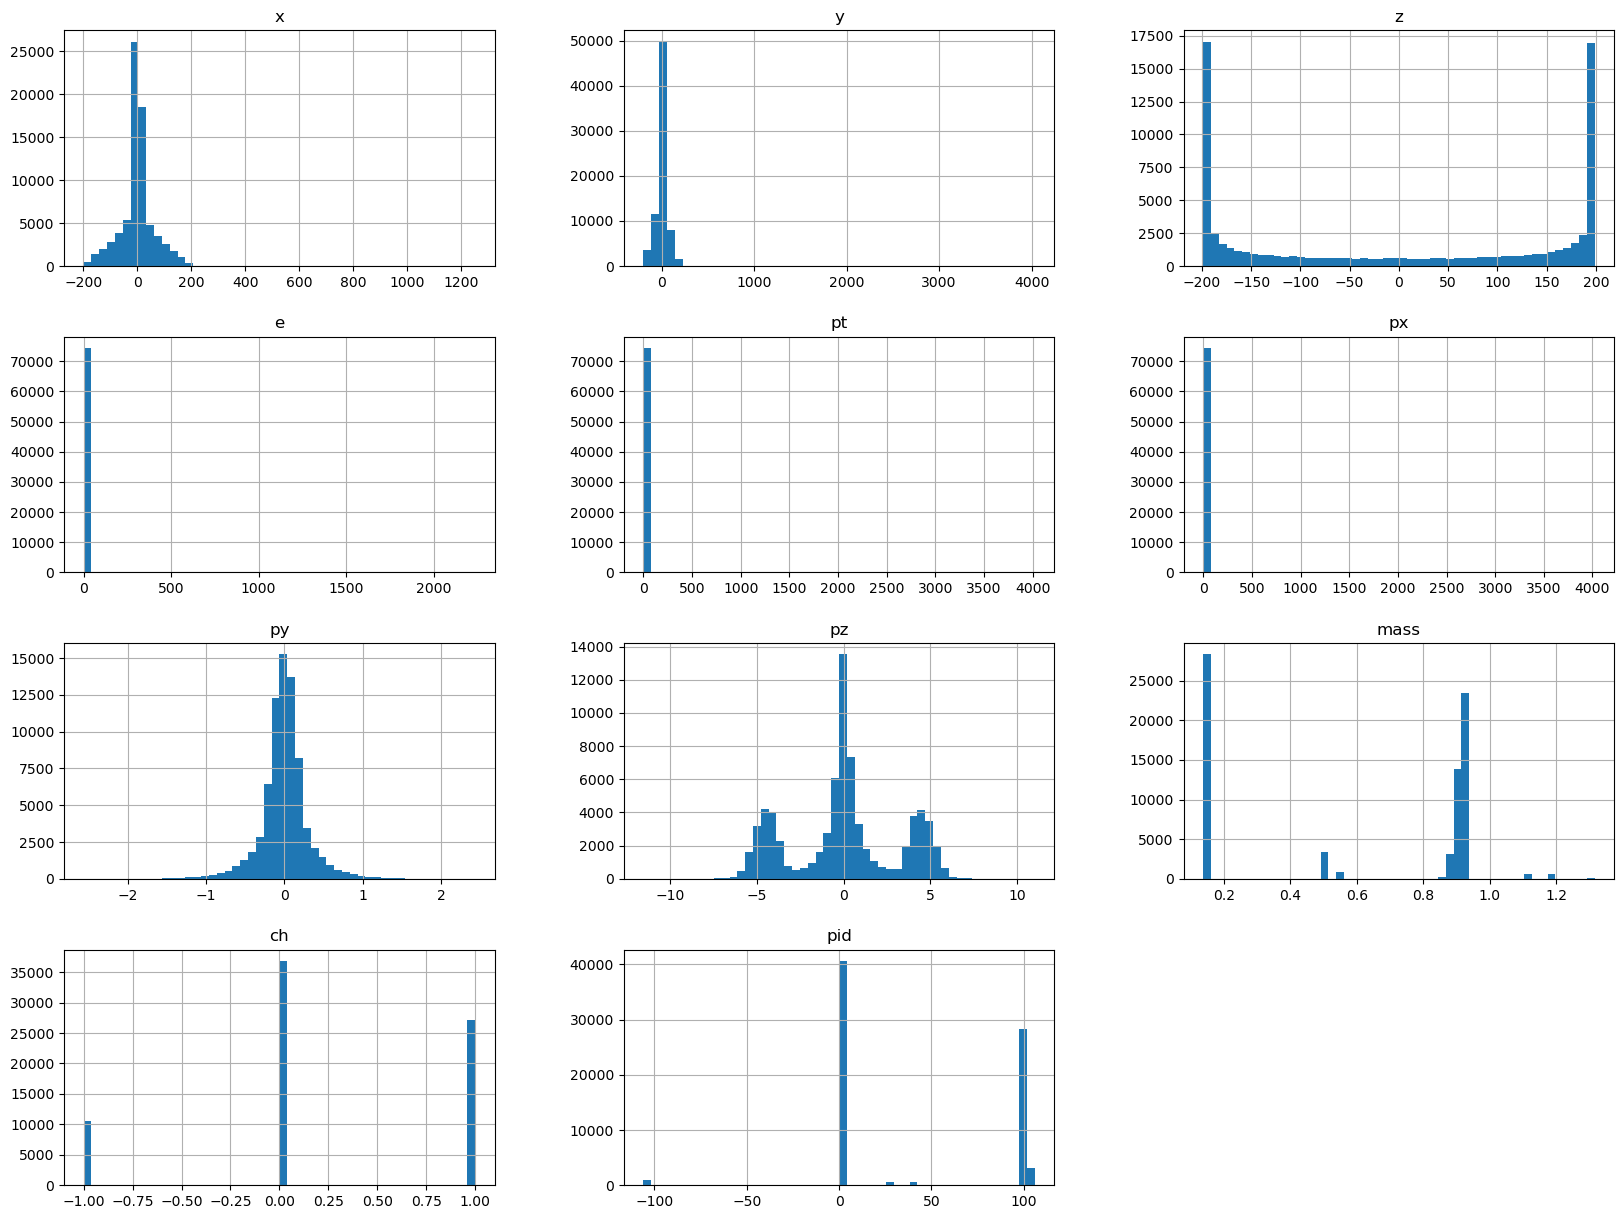

In [34]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [35]:
dataset.describe()

,x,y,z,e,pt,px,py,pz,mass,ch,pid
count,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000,74478.000000
mean,0.665828,1.214144,0.274372,3.186664,1.371159,1.048407,-0.000093,-0.000892,0.602540,0.222697,42.557359
std,62.206268,75.021616,162.762821,28.220798,50.252250,50.259100,0.303948,3.127470,0.377676,0.674908,52.093118
min,-198.262000,-195.846000,-198.761000,0.000000,0.000886,-2.603290,-2.564740,-11.552000,0.138000,-1.000000,-106.000000
25%,-14.011900,-12.922900,-186.310000,0.654560,0.136476,-0.132908,-0.130932,-1.737900,0.138000,0.000000,1.000000
50%,0.042644,0.012879,1.252205,2.074345,0.217805,-0.000347,0.000000,0.000000,0.895116,0.000000,1.000000
75%,14.345275,13.245950,185.750500,4.475385,0.414595,0.134304,0.131041,1.737685,0.922763,1.000000,101.000000
max,1251.000000,4034.000000,198.678000,2237.000000,4021.000000,4021.000000,2.434530,11.016100,1.315000,1.000000,106.000000


 ### **mean**: Media aritmética:

Es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos.

\begin{align}
\mu = \bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}
\end{align}

### **std**:  Desviación estandar

* La varianza es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. 

* La varianza intenta describir la dispersión de los datos.

\begin{align}
Var = \sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}
\end{align}

std es la raíz cuadrada de la varianza.

\begin{align}
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}}
\end{align}

### **Cuartiles**

Los **cuantiles** son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria.

Los **cuartiles** son cuantiles que se multiplican por un cuarto de un conjunto de datos, sinedo los tres puntos que dividen el conjunto de datos en cuatro grupos iguales, cada grupo comprende un cuarto de los datos.

**Q1**: es el número medio entre el número más pequeño y la mediana del conjunto de datos. 

**Q2**: es la mediana de los datos. 

**Q3**: es el valor medio entre la mediana y el valor más alto del conjunto de datos. 

La diferencia entre **Q3** y **Q1** es el rango intercuartilar **IQR**

                IQR = Q3 - Q1

Cualquier punto de datos que se encuentre fuera del rango de decisión definido como:

                Límite inferior: (Q1 - 1.5 * IQR)
                Límite superior: (Q3 + 1.5 * IQR)

se considera un valor atípico.

In [36]:
IQR=dataset["pt"].quantile(0.75)-dataset["pt"].quantile(0.25)
low_bound = dataset["pt"].quantile(0.25) - (1.5*IQR) #inferior
upper_bound = dataset["pt"].quantile(0.75) + 1.5*IQR #superior
print("El rango intercuartilar (IQR) es:", IQR)
print("El límite superior es:", upper_bound)
print("El límite inferior es:", low_bound)

El rango intercuartilar (IQR) es: 0.27811825
El límite superior es: 0.831771875
El límite inferior es: -0.280701125


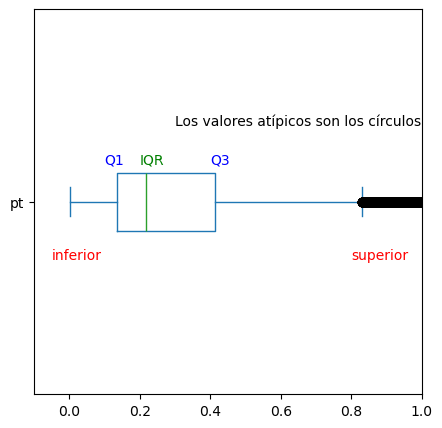

In [37]:
dataset['pt'].plot.box(vert=False,figsize=(5, 5))
plt.xlim(-0.1, 1)
plt.text(0.3,1.2,'Los valores atípicos son los círculos')
plt.text(-0.05,0.85,"inferior",color='r')
plt.text(0.8,0.85,"superior",color='r')
plt.text(0.1,1.1,"Q1",color='b')
plt.text(0.2,1.1,"IQR",color='g')
plt.text(0.4,1.1,"Q3",color='b')
plt.show()



### Identificación de particulas (PID)

In [38]:
print(pd.Series(dataset['pid']).value_counts(sort = True))

pid
 1      40637
 101    28306
 106     2317
-106     1019
 102      879
 40       630
 27       575
 49        54
-1         48
-40        10
-49         2
-27         1
Name: count, dtype: int64


In [39]:
dataset.loc[data['pid'] != 101, "pid"] = 0 #Filtrado 
dataset.loc[data['pid'] == 101, "pid"] = 1 #Filtrado piones


In [40]:
print(pd.Series(dataset['pid']).value_counts(sort = True))

pid
0    46172
1    28306
Name: count, dtype: int64


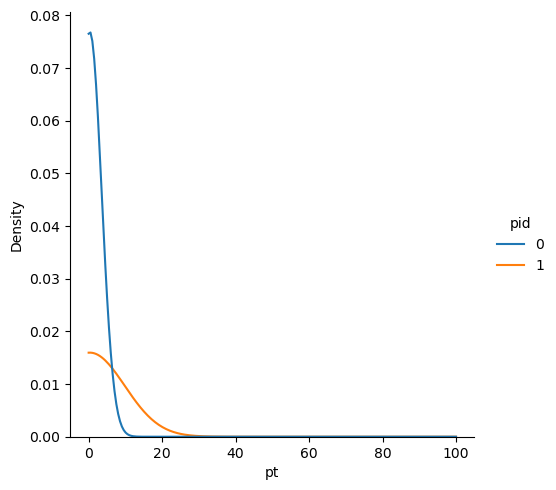

In [41]:
#sns.pairplot(dataset, hue='pid', height=2.25)# hue separar por alguna categoría
sns.displot(dataset, x="pt", hue="pid", kind="kde",clip=(0.0, 100.0)) 

### **Covarianza**

La covarianza la varianza aplicado a una variable bidimensional. Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias. 

\begin{align}
Cov_{x, y} = \frac{\sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)}{n}
\end{align}

La covarianza indica el sentido de la correlación entre las variables:
1. cov > 0-> correlación es directa
2. cov = 0 -> no existe correlación
3. cov < 0 -> correlación es inversa. 

### **Matriz de correlación**

$$\Sigma = 
\begin{bmatrix} 
Var(x_1) & Cov(x_1, x_2) & \cdots & Cov(x_1, x_n)\\ 
Cov(x_2, x_1) & Var(x_2) & \cdots & Cov(x_2, x_n)\\
 \vdots & \vdots & \vdots & \vdots \\ 
Cov(x_n, x_1) & Cov(x_n, x_2) & \cdots & Var(x_n)\\
\end{bmatrix}$$

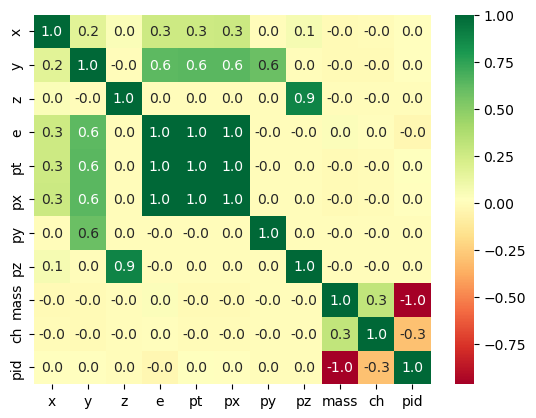

In [42]:
def corr_matrix(data): #matriz de correlación
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, fmt=".1f", cbar=True, cmap="RdYlGn")

corr_matrix(dataset)

## c. Separar en datos de entrenamiento y de prueba

### Crear variable dependiente (Y = pid) e independientes

In [47]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values #pid


### Separar datos en datos de entrenamiento y datos de prueba

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## d. Escalamiento de las caracteristicas